# **Fisherfaces**

In [1]:
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt

### **Pre process dataaset**

In [2]:
faces = {}
with zipfile.ZipFile("Dataset.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue
        with facezip.open(filename) as image:
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(),np.uint8), cv2.IMREAD_GRAYSCALE)

In [3]:
resized_faces = {}
new_size = (50, 50)  # Specify the desired size of the resized images

for filename, face_image in faces.items():
    resized_image = cv2.resize(face_image, new_size)
    resized_faces[filename] = resized_image
faces = resized_faces

In [4]:
faceshape= list (faces.values())[0].shape
facematrix=[]
facelable=[]

for key, val in faces.items():
    if key.split('/')[2]=='10.pgm':
        continue
    facematrix.append(val.flatten())
    facelable.append(key.split('/')[1])

facematrix=np.array(facematrix, dtype=np.float64)
mean_face= np.mean(facematrix, axis=0)

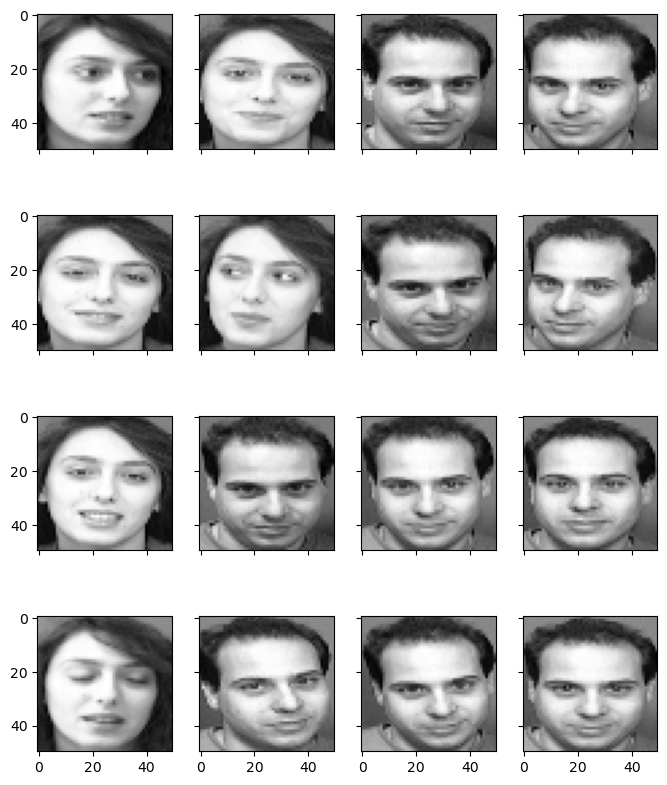

In [5]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=True, figsize = (8,10))
faceimages = list(faces.values())[-16:]
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i],cmap = "gray")
plt.show()

In [6]:
faceshape = list(faces.values())[1].shape
faceshape

(50, 50)

In [7]:
classes = set(filename.split("/")[1] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of pictures:", len(faces))

Number of classes: 40
Number of pictures: 400


In [8]:
facematrix = []
facelabel = []

for key,val in faces.items():
    if key.split("/")[2] == "10.pgm":
        continue
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[1])
facematrix = np.array(facematrix, dtype=np.float64)
mean_face = np.mean(facematrix, axis = 0)
A =facematrix - mean_face

## **Average Face**

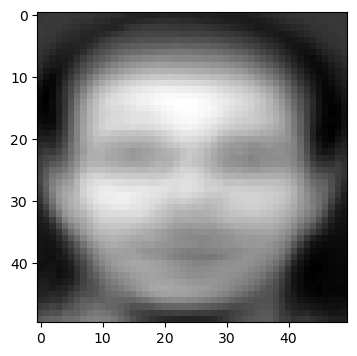

In [9]:
fig, axes = plt.subplots(figsize = (4,5))
axes.imshow(mean_face.reshape(50,50),cmap = "gray")
plt.show()

In [10]:
covariance_matrix = np.cov(A.T, rowvar=False)
covariance_matrix.shape

(360, 360)

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvectors.shape

(360, 360)

In [12]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[sorted_indices]
sorted_eigenvectors.dtype

dtype('float64')

In [13]:
U = A.T @ sorted_eigenvectors 
U = U.T

## **Average face of each person**

In [14]:
person_average = {}
for key, items in faces.items():
    if key.split("/")[2] == "10.pgm":
        continue
    clas = key.split("/")[1]
    if clas not in person_average.keys():
        person_average[clas] = items.flatten()
    else:
        person_average[clas] += items.flatten()

for key, items in person_average.items():
    person_average[key] = items/9

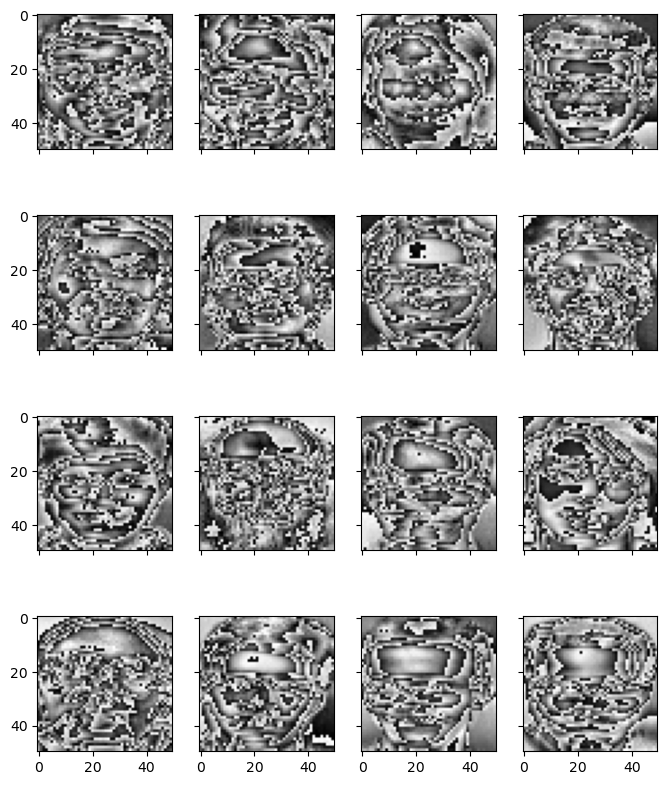

In [15]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=True, figsize = (8,10))
faceimages = list(person_average.values())[-16:]
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i].reshape(50,50),cmap = "gray")
plt.show()

## **Scatter matrix**

In [16]:
within_scatter = np.zeros((2500,2500))
for key, items in faces.items():
    clas = key.split("/")[1]
    if key.split("/")[2] == "10.pgm":
        continue
    val = items.flatten()  - person_average[clas]
    s = np.outer(val,val)
    within_scatter += s

In [17]:
between_scatter = np.zeros((2500,2500))
for key,val in person_average.items():
    sub = val - mean_face
    between_scatter += 9 *(np.outer(val - mean_face, val - mean_face))

## **Eigenvactor and Eigenvalues**

In [18]:
product_matrix = np.dot(np.linalg.inv(within_scatter), between_scatter)
eigenvalues, eigenvectors = np.linalg.eig(product_matrix)

# Sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
w = sorted_eigenvectors

In [19]:
w = w.T
#center the data.
fisher_matrix = (facematrix - mean_face) @ w

## **Test**

[[33 33 35 ... 31 39 36]]
Best match for s1/10.pgm is s1


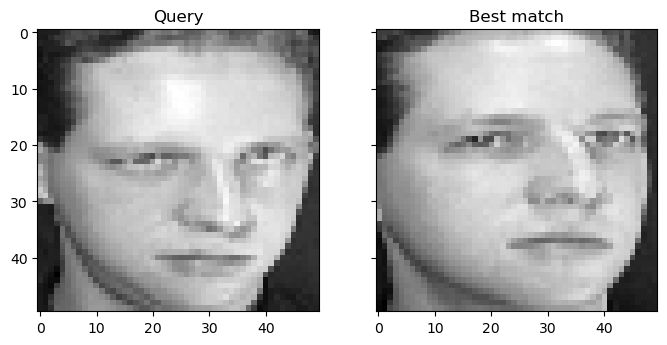

[[ 35  37  37 ... 132 116  97]]
Best match for s2/10.pgm is s2


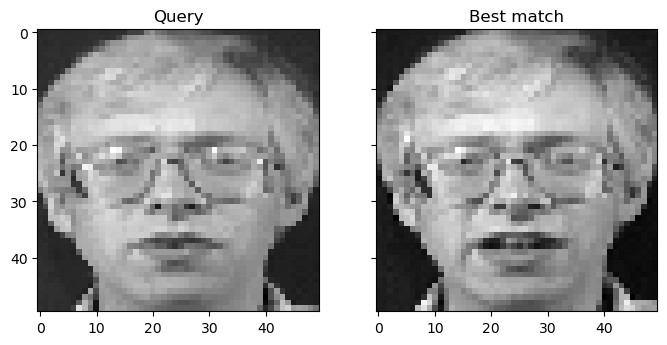

[[105 105 106 ...  51  55  56]]
Best match for s3/10.pgm is s3


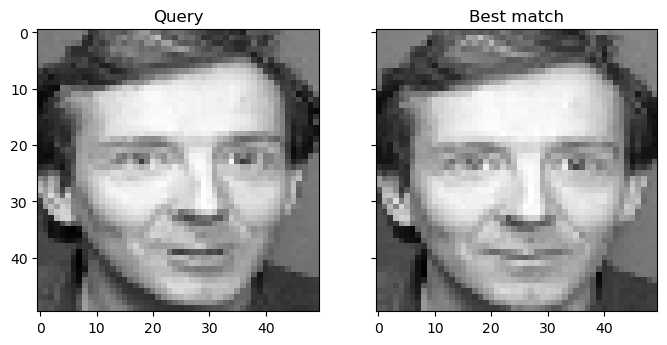

[[121 119 120 ...  79  77  79]]
Best match for s4/10.pgm is s4


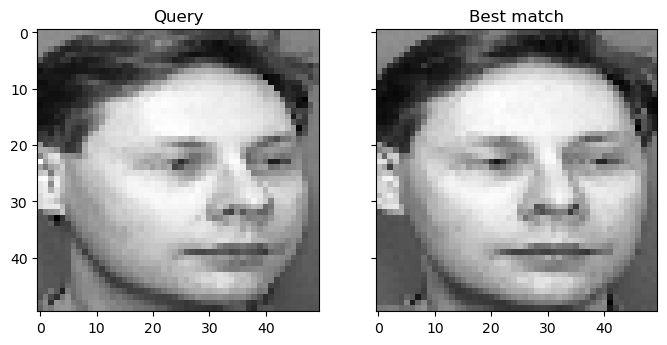

[[125 125 125 ...  87  87  87]]
Best match for s5/10.pgm is s40


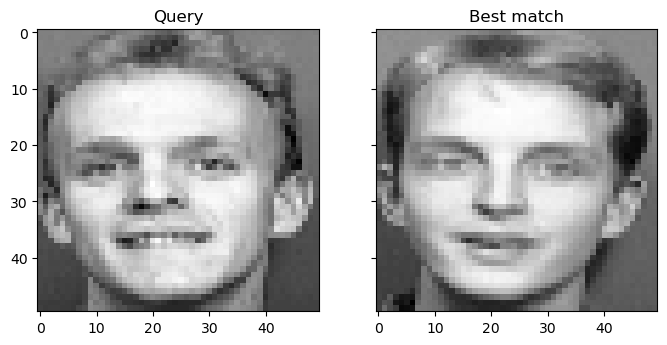

[[155 154 152 ... 111 107 108]]
Best match for s6/10.pgm is s6


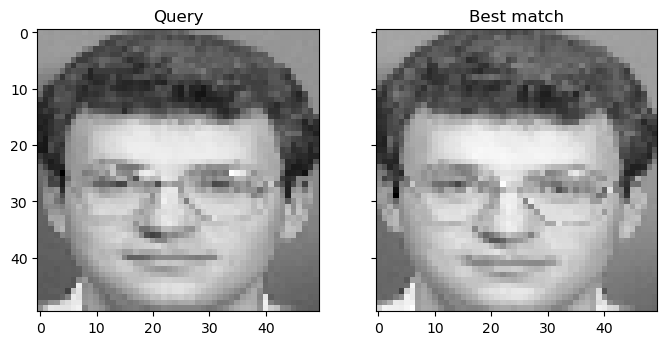

[[68 68 68 ... 72 73 73]]
Best match for s7/10.pgm is s7


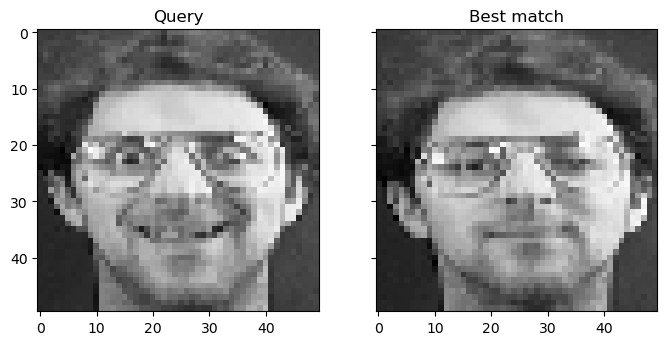

[[115 114 115 ...  87  73  51]]
Best match for s8/10.pgm is s8


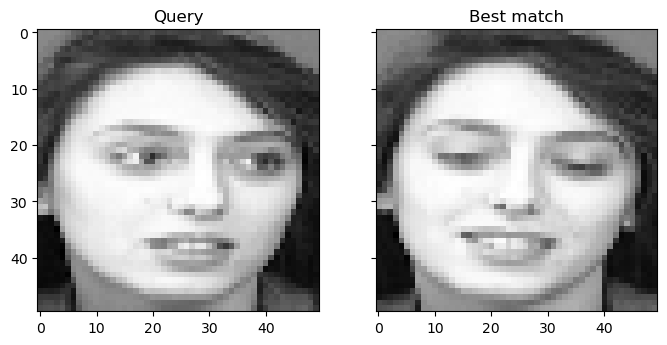

[[109 111 111 ...  90  85  85]]
Best match for s9/10.pgm is s9


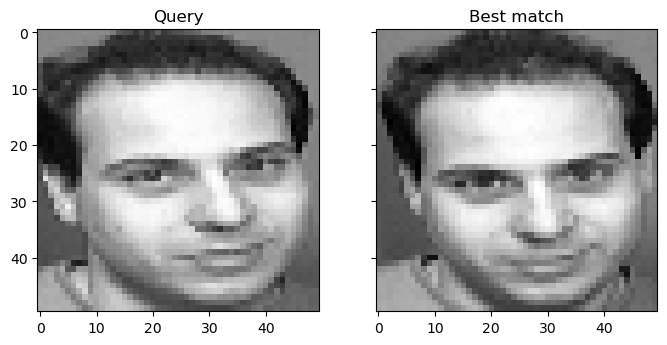

[[131 131 132 ...  20  22  29]]
Best match for s10/10.pgm is s8


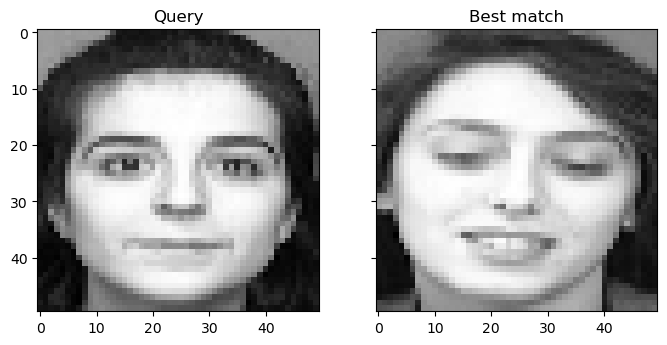

[[47 48 48 ... 33 37 41]]
Best match for s11/10.pgm is s11


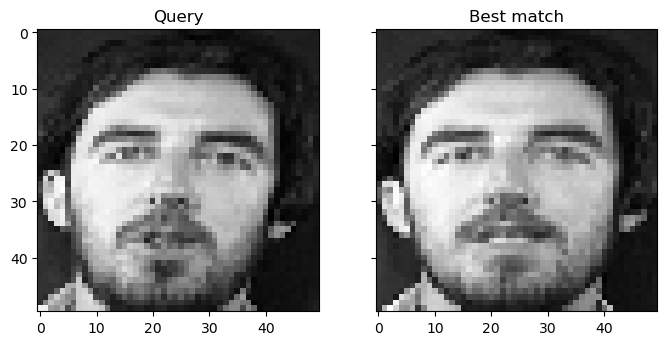

[[104 104 105 ...  34  36  32]]
Best match for s12/10.pgm is s12


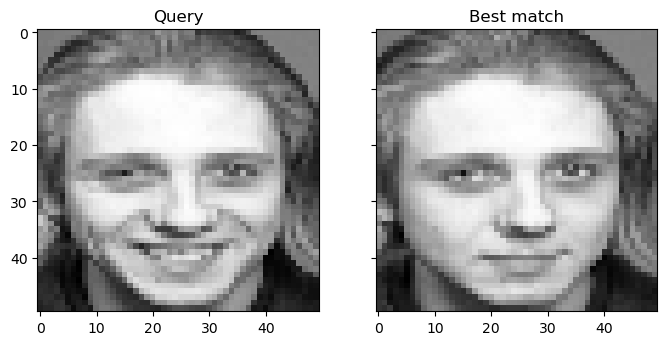

[[107 108 108 ...  18  20  22]]
Best match for s13/10.pgm is s13


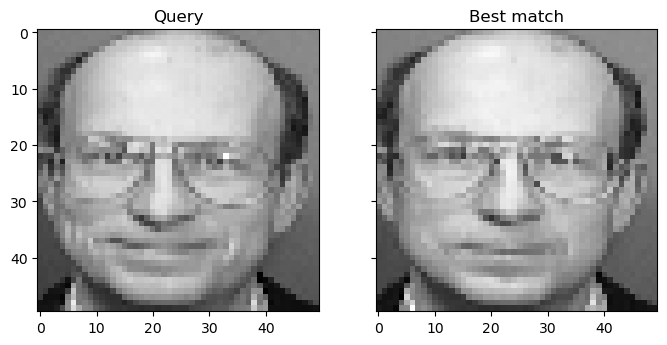

[[ 44  44  45 ... 148 109 164]]
Best match for s14/10.pgm is s14


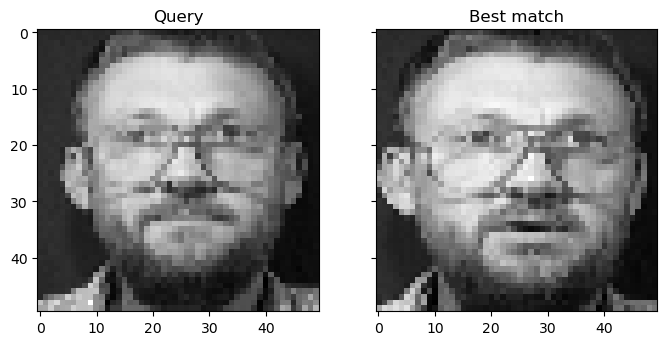

[[121 122 122 ...  79  76  75]]
Best match for s15/10.pgm is s15


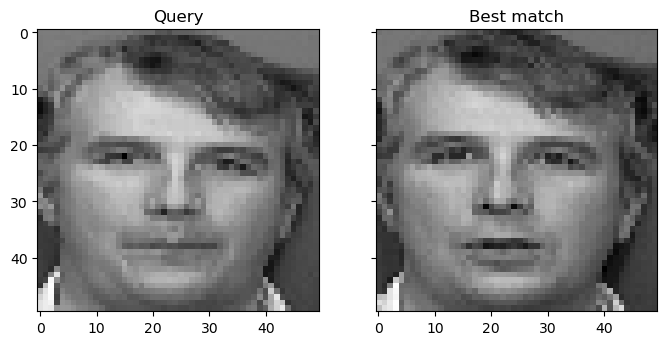

[[59 60 57 ... 51 54 56]]
Best match for s16/10.pgm is s16


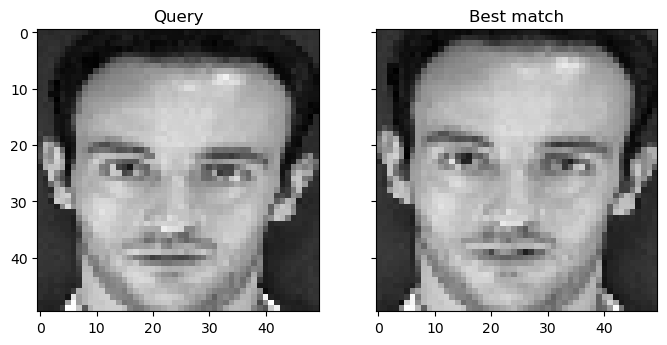

[[46 48 46 ... 43 44 43]]
Best match for s17/10.pgm is s17


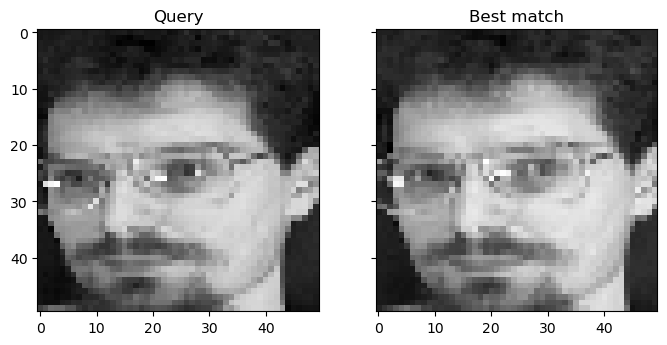

[[120 120 119 ...  80  82  83]]
Best match for s18/10.pgm is s18


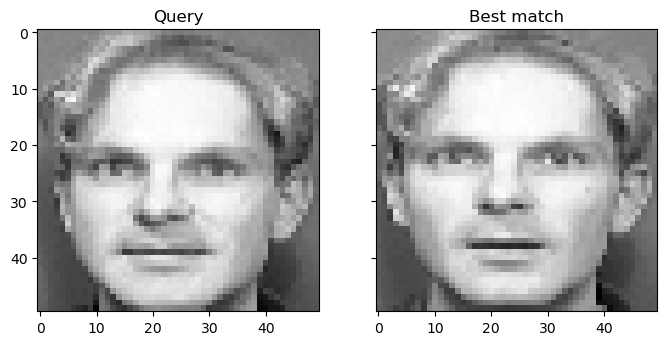

[[45 46 47 ... 40 43 38]]
Best match for s19/10.pgm is s19


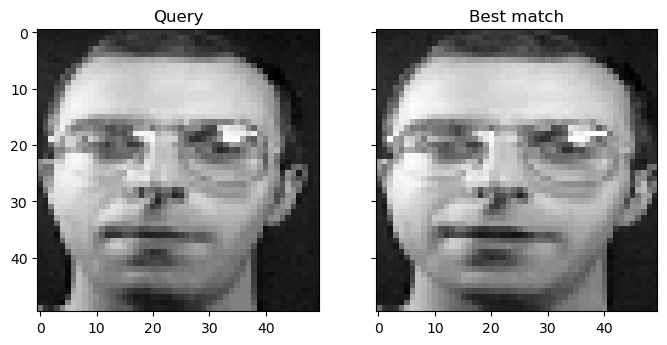

[[111 112 112 ...  36  50  52]]
Best match for s20/10.pgm is s20


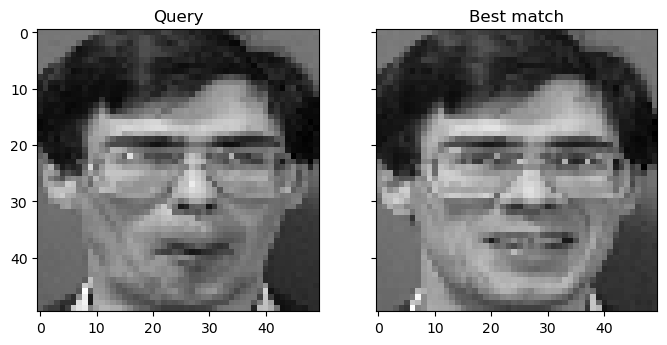

[[103 103 103 ... 168 170 142]]
Best match for s21/10.pgm is s21


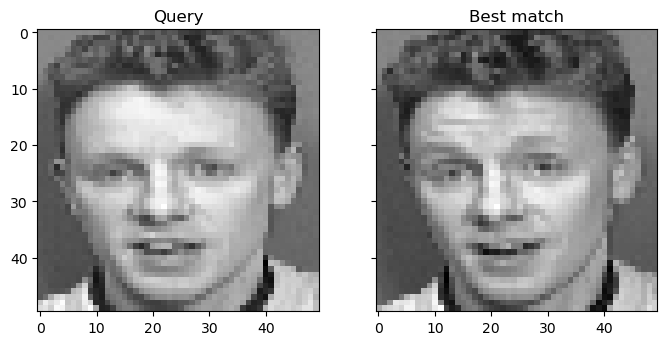

[[ 58  60  57 ...  85 182 107]]
Best match for s22/10.pgm is s22


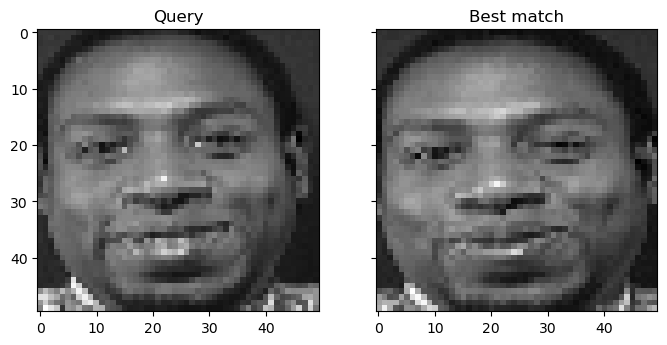

[[124 125 126 ...  76  78  80]]
Best match for s23/10.pgm is s23


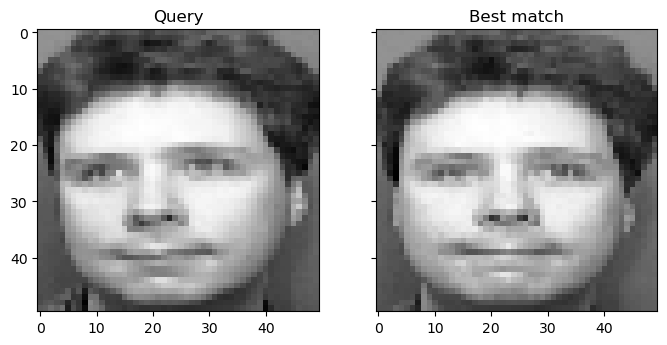

[[38 45 36 ... 58 59 57]]
Best match for s24/10.pgm is s24


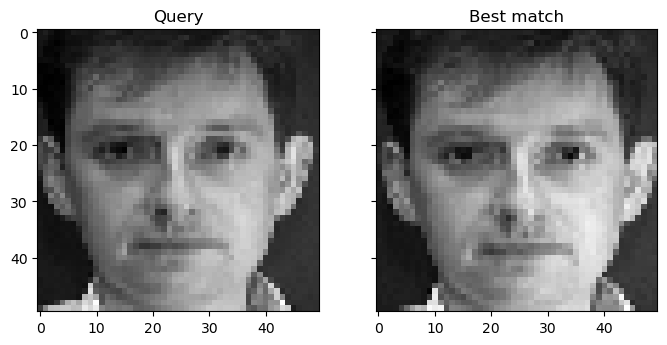

[[120 119 119 ... 101  95  98]]
Best match for s25/10.pgm is s25


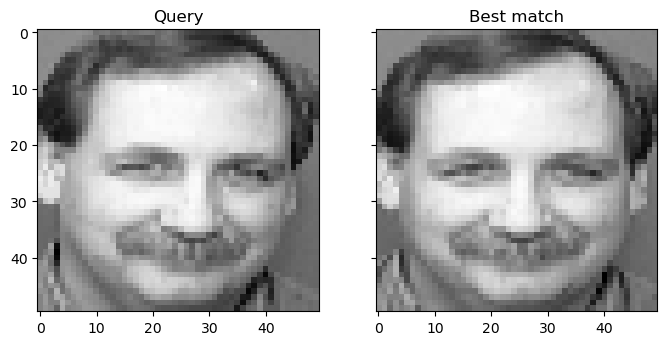

[[110 111 111 ...  61  73  69]]
Best match for s26/10.pgm is s26


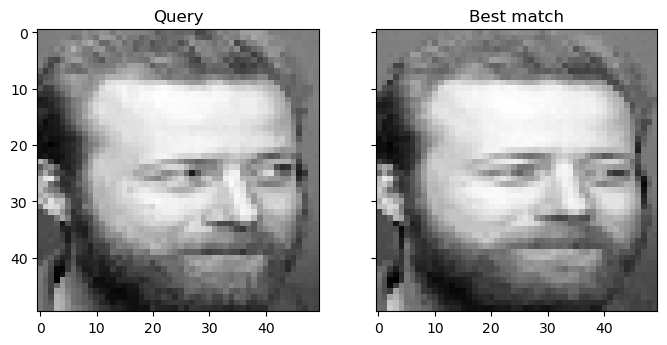

[[44 41 40 ... 23 25 23]]
Best match for s27/10.pgm is s27


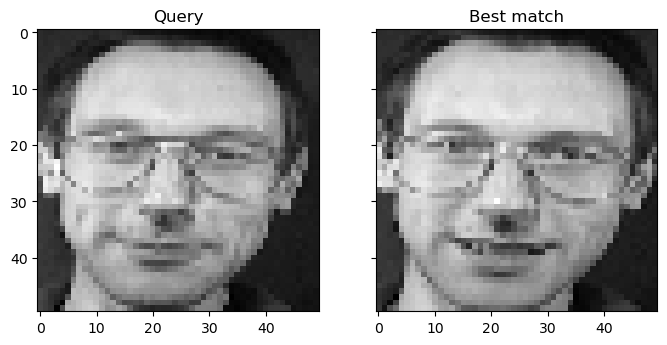

[[122 125 124 ...  53  56  57]]
Best match for s28/10.pgm is s28


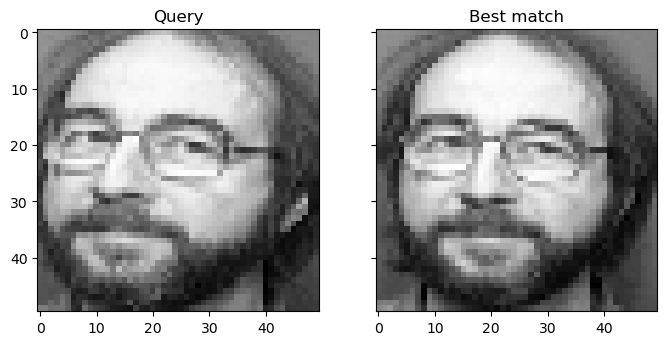

[[99 98 99 ... 46 51 51]]
Best match for s29/10.pgm is s29


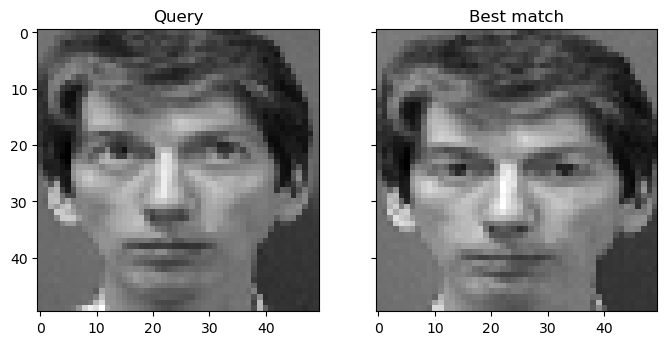

[[108 109 107 ...  68  66  68]]
Best match for s30/10.pgm is s30


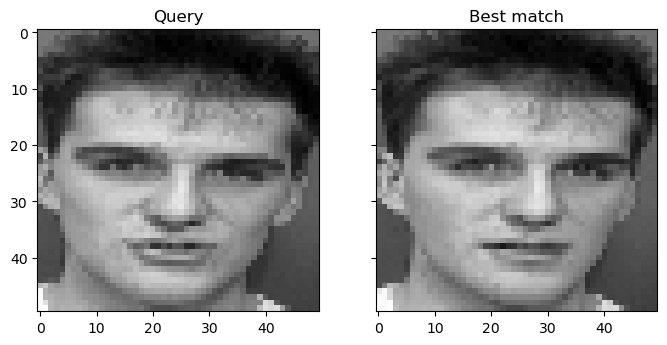

[[ 35  36  36 ... 166 204 190]]
Best match for s31/10.pgm is s31


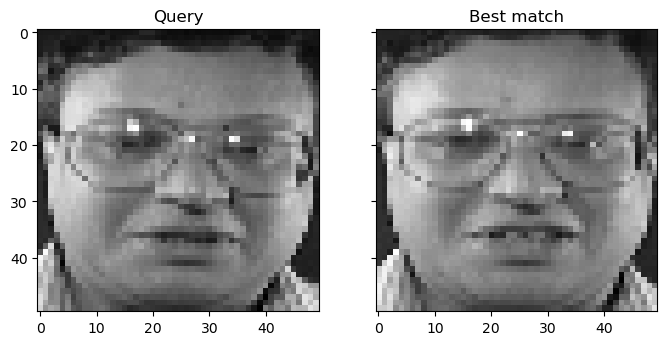

[[34 34 35 ... 26 26 27]]
Best match for s32/10.pgm is s32


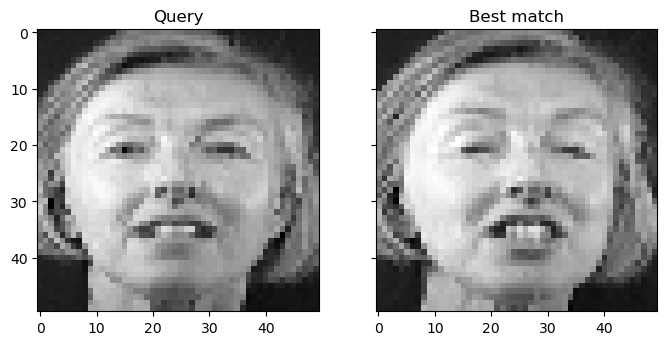

[[ 94  93  95 ... 134  98  99]]
Best match for s33/10.pgm is s33


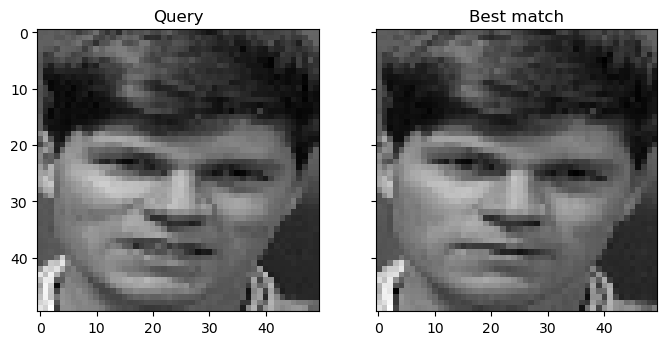

[[ 23  23  24 ... 184 183 186]]
Best match for s34/10.pgm is s34


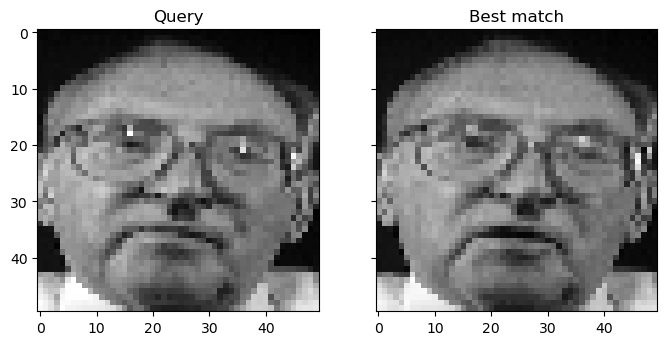

[[ 89  90  91 ... 188 185 176]]
Best match for s35/10.pgm is s35


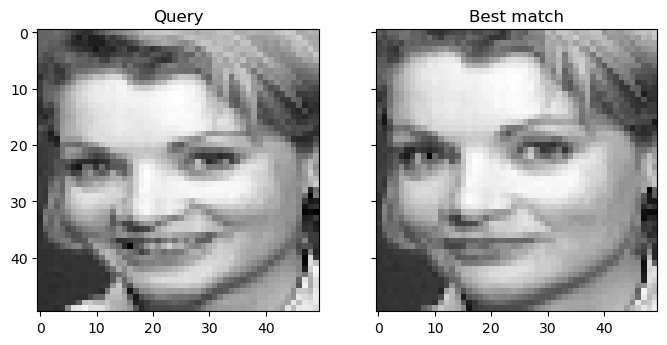

[[ 44  48  44 ... 154  48  62]]
Best match for s36/10.pgm is s19


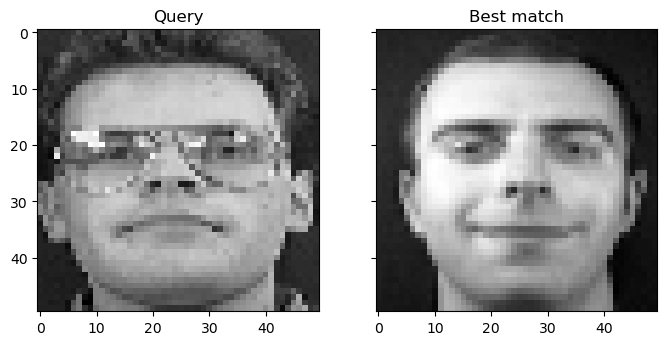

[[119 122 123 ... 111 103  97]]
Best match for s37/10.pgm is s37


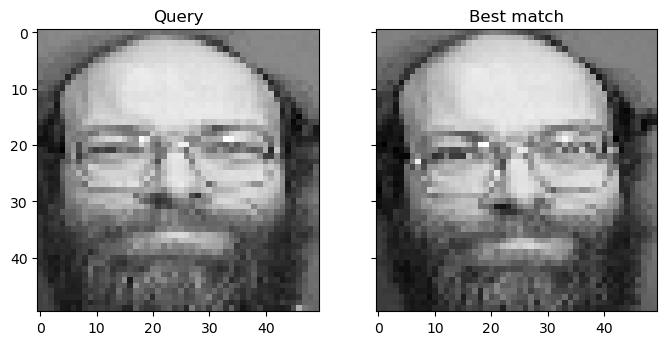

[[104 105 103 ...  45  69  66]]
Best match for s38/10.pgm is s38


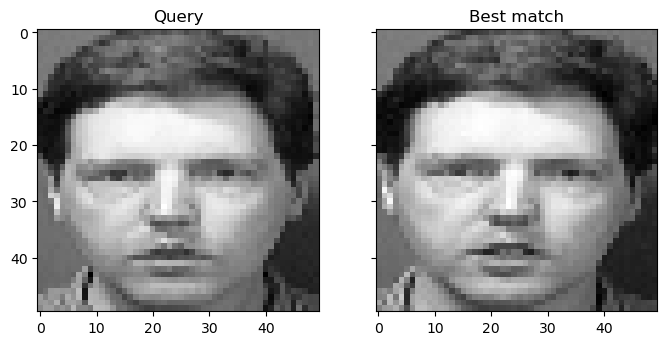

[[ 87  90  90 ...  30  75 109]]
Best match for s39/10.pgm is s39


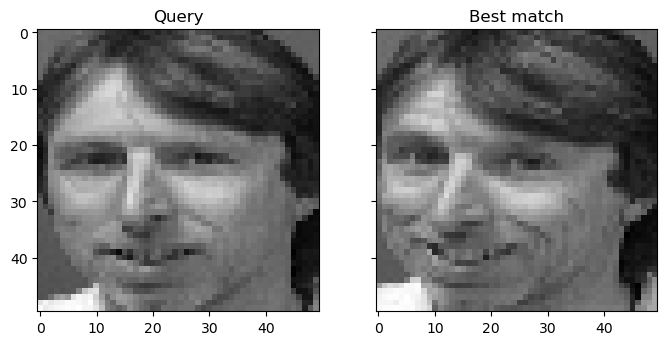

[[124 125 125 ...  32  33  34]]
Best match for s40/10.pgm is s5


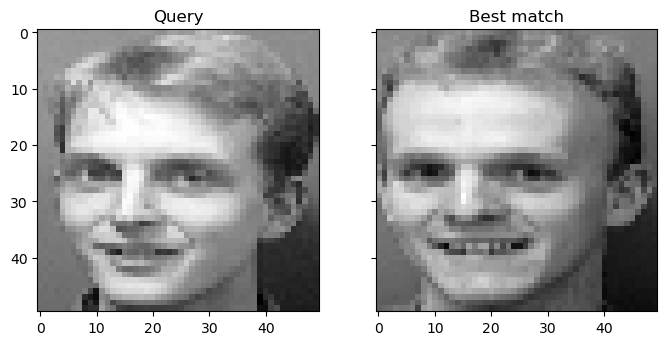

In [20]:
# correct = 0
# for i in range(1, 41):
#     query = faces[f"Dataset/s{i}/10.pgm"].reshape(1, -1)
#     print(query)
#     query_feature = query - mean_face
#     query_fisher = query_feature @ w
    

#     distances = np.linalg.norm(fisher_matrix - query_fisher, axis=1)
    
#     # find the index of the best match
#     best_match_index = np.argmin(distances)
#     best_match_label = facelable[best_match_index]

#     if best_match_label == f"s{i}": correct +=1
    
#     print('Best match for s%d/10.pgm is %s' % (i, best_match_label))

#     fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 6))
#     axes[0].imshow(query.reshape(faceshape), cmap='gray')
#     axes[0].set_title('Query')
#     axes[1].imshow(facematrix[best_match_index].reshape(faceshape), cmap='gray')
#     axes[1].set_title('Best match')

#     plt.show()

In [22]:
correct = 0
for i in range(1, 41):
    query = faces[f"Dataset/s{i}/10.pgm"].reshape(1, -1)
    query_feature = query - mean_face
    query_fisher = query_feature @ w

    distances = np.linalg.norm(fisher_matrix - query_fisher, axis=1)

    # find the index of the best match
    best_match_index = np.argmin(distances)
    best_match_label = facelable[best_match_index]

    if best_match_label == f"s{i}":
        correct += 1

    if distances[best_match_index] > threshold:
        best_match_label = "Unknown"  # Set label as "Unknown" if distance exceeds threshold

    print('Best match for s%d/10.pgm is %s' % (i, best_match_label))

    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 6))
    axes[0].imshow(query.reshape(faceshape), cmap='gray')
    axes[0].set_title('Query')
    axes[1].imshow(facematrix[best_match_index].reshape(faceshape), cmap='gray')
    axes[1].set_title('Best match')

    plt.show()

NameError: name 'threshold' is not defined

## **Accuracy**

In [21]:
print(f"{(correct/40)*100}%")

90.0%
